<a href="https://colab.research.google.com/github/NooshinS/Machine-Learning/blob/main/K_means_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

Preparation Dataset

In [ ]:
dataset=pd.read_csv('K-means.csv')
dataset.info
display(dataset.dtypes.value_counts())
dataset.isnull().sum()


float64    14
int64       3
object      1
dtype: int64

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
dataset.drop(columns=['MINIMUM_PAYMENTS'], inplace=True )
dataset
dataset=dataset.fillna(0)
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
x=dataset.iloc[ : , [1,3]].values
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-0.73198937, -0.42489974],
       [ 0.78696085, -0.46955188],
       [ 0.44713513, -0.10766823],
       ...,
       [-0.7403981 , -0.40196519],
       [-0.74517423, -0.46955188],
       [-0.57257511,  0.04214581]])

Detrmine the number of clusters

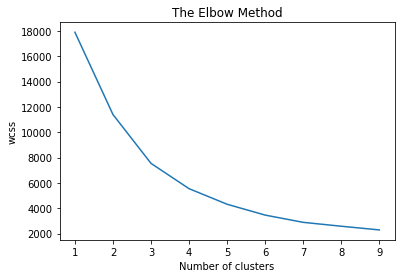

In [ ]:
#Elbow Method
wcss= []
for i in range(1,10):
  kmeans=KMeans (n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans=KMeans (n_clusters=5, init="k-means++", random_state=42)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)


[0 2 2 ... 0 0 0]


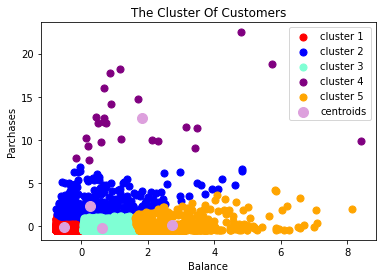

In [ ]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0, 1], s=50, c="red", label="cluster 1" )
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=50, c="blue", label="cluster 2" )
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=50, c="aquamarine", label="cluster 3" )
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=50, c="purple", label="cluster 4" )
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=50, c="orange", label="cluster 5" )
#plt.scatter(x[y_kmeans==5,0], x[y_kmeans==5,1], s=50, c="green", label="cluster 6" )
#plt.scatter(x[y_kmeans==6,0], x[y_kmeans==6,1], s=50, c="pink", label="cluster 7" )
#plt.scatter(x[y_kmeans==7,0], x[y_kmeans==7,1], s=50, c="brown", label="cluster 8" )
#plt.scatter(x[y_kmeans==8,0], x[y_kmeans==8,1], s=50, c="black", label="cluster 9" )
#plt.scatter(x[y_kmeans==9,0], x[y_kmeans==9,1], s=50, c="plum", label="cluster 10" )
#plt.scatter(x[y_kmeans==10,0], x[y_kmeans==10,1], s=50, c="khaki", label="cluster 11" )
#plt.scatter(x[y_kmeans==11,0], x[y_kmeans==11,1], s=50, c="olive", label="cluster 12" )
#plt.scatter(x[y_kmeans==12,0], x[y_kmeans==12,1], s=50, c="lawngreen", label="cluster 13" )
#plt.scatter(x[y_kmeans==13,0], x[y_kmeans==13,1], s=50, c="maroon", label="cluster 14" )
#plt.scatter(x[y_kmeans==14,0], x[y_kmeans==14,1], s=50, c="goldenrod", label="cluster 15" )
plt.scatter(kmeans.cluster_centers_[ : , 0], kmeans.cluster_centers_[ : , 1], s=100, c="plum", label="centroids")
plt.title("The Cluster Of Customers")
plt.xlabel("Balance")
plt.ylabel("Parchases")
plt.legend()
plt.show()


Dendogram

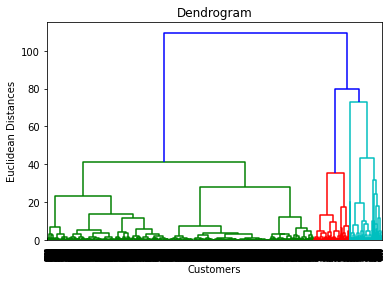

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(x, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


In [ ]:
pd.DataFrame({'Method': ['Elbow', 'Dendogram'], 'Clusters': [5,4]})

,Method,Clusters
0,Elbow,5
1,Dendogram,4
